In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('style.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [20]:
print(X_train[0][1])

5


In [3]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [6]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b     
    return p

In [9]:
# get a row from our training data
x_vec = X_train[2,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [852   2   1  35]
f_wb shape (), prediction: 177.99999898940814


In [12]:
def predict(x, w, b):
    """"
    Single predict using linear regression
    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model parameters (weights)
        b (scalar): model parameter (bias)
    Returns:
        p (scalar): prediction
    """
    p = np.dot(x, w) + b
    return p

In [10]:
def compute_cost(X, y, w, b):
    """
    Compute cost
    Args:
        X (ndarray (m, n)): Data, m examples with n features
        y (ndarray (m,)): Target values
        w (ndarray (n,)): model weights
        b (scalar): model bias
    """
    # Number of training examples
    m = np.shape(X)[0]

    cost = 0
    for i in range(m):
        f_wb_i = predict(X[i], w, b)
        cost += (f_wb_i - y[i]) ** 2
    cost /= 2 * m
    return cost

In [13]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


In [21]:
def compute_gradient(X, y, w, b):
    """
    Computes gradient using: 
        dJ_dw: sum((predict(X_i, w, b) - y_i) * X_i) / m
        dJ_db: sum(predict(X_i, w, b) - y_i) / m
    """
    m, n = np.shape(X)
    dj_dw = np.zeros(n)
    dj_db = 0.
    for i in range(m):
        err = (predict(X[i], w, b) - y[i])
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [22]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [46]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [52]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration 1000: Cost   686.69   
Iteration 2000: Cost   677.19   
Iteration 3000: Cost   668.48   
Iteration 4000: Cost   660.50   
Iteration 5000: Cost   653.19   
Iteration 6000: Cost   646.49   
Iteration 7000: Cost   640.35   
Iteration 8000: Cost   634.72   
Iteration 9000: Cost   629.56   
b,w found by gradient descent: -0.02,[ 0.22  0.03 -0.11 -0.58] 
prediction: 430.50, target value: 460
prediction: 283.93, target value: 232
prediction: 164.52, target value: 178


In [48]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [49]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma  

In [50]:
X_norm

array([[ 1.26,  1.34, -0.71,  1.22],
       [-0.08, -0.27,  1.41,  0.  ],
       [-1.18, -1.07, -0.71, -1.22]])

In [51]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 5.0e-4
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 49454.33   
Iteration 1000: Cost 15933.51   
Iteration 2000: Cost  5746.77   
Iteration 3000: Cost  2107.78   
Iteration 4000: Cost   774.87   
Iteration 5000: Cost   284.96   
Iteration 6000: Cost   104.79   
Iteration 7000: Cost    38.54   
Iteration 8000: Cost    14.17   
Iteration 9000: Cost     5.21   
b,w found by gradient descent: 288.05,[ 38.06  41.53 -30.82  36.36] 
prediction: 457.95, target value: 460
prediction: 230.29, target value: 232
prediction: 175.90, target value: 178


# Feature Engineering and Polynomial Regression

In [59]:
from utils import zscore_normalize_features, run_gradient_descent_feng

In [66]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
print(x.shape)
print(X.shape)

(20,)
(20, 1)


Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


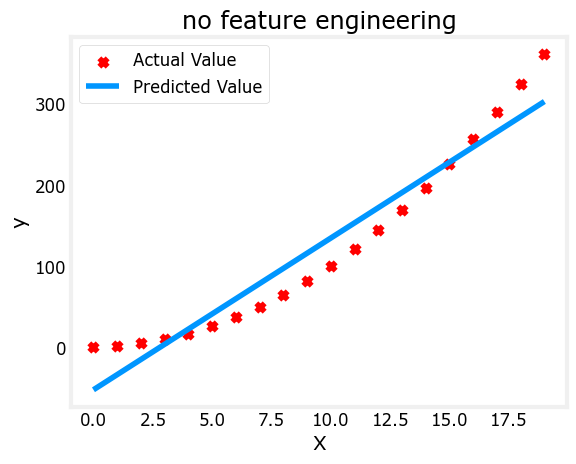

In [60]:
model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [67]:
# Engineering features
X = np.square(X)


Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


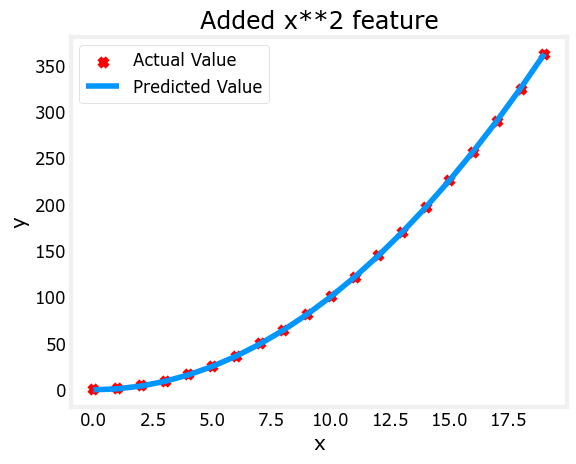

In [68]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [69]:
print(X)

[[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]]


In [70]:
X = np.c_[x, x**2, x**3]
print(X)

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


Iteration         0, Cost: 2.20310e-01
Iteration    100000, Cost: 1.46509e-02
Iteration    200000, Cost: 1.19083e-02
Iteration    300000, Cost: 9.71939e-03
Iteration    400000, Cost: 7.97156e-03
Iteration    500000, Cost: 6.57558e-03
Iteration    600000, Cost: 5.46031e-03
Iteration    700000, Cost: 4.56898e-03
Iteration    800000, Cost: 3.85632e-03
Iteration    900000, Cost: 3.28619e-03
w,b found by gradient descent: w: [ -1.46  -9.16  23.3    5.73 -11.18 -14.85  -9.32  -0.88   6.13   9.65
   9.17   5.09  -1.84 -10.77  -0.06], b: -0.0073


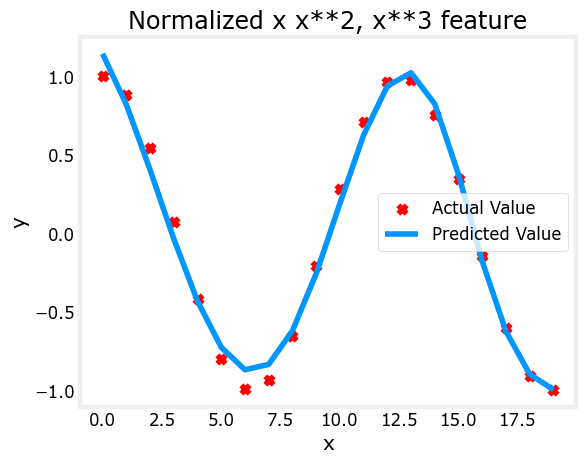

In [72]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()